### 1. Installing dependencies

In [176]:
!pip install gymnasium gym-anytrading pandas matplotlib stable-baselines3[extra] finta

### 2. importing packages

In [177]:
import gymnasium as gym
import gym_anytrading
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions

from stable_baselines3 import DQN
from stable_baselines3 import A2C
from stable_baselines3 import PPO



from gym_anytrading.envs import StocksEnv
from finta import TA






### Constant

In [178]:
WINDOW_SIZE = 14
DATASET_PATH = '/content/Processed_predicted_TSLA (1).csv'


### 3. Read the dataset and preprocess it

In [179]:
df = pd.read_csv(DATASET_PATH)

In [180]:
df['Date'] = pd.to_datetime(df.Date)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [181]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Sentiment,Predicted_Close
0,0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,1,NaN
1,1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,0,NaN
2,2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,0,NaN
3,3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,1,NaN
4,4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,-1,NaN


In [182]:
df.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Unnamed: 0,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Sentiment,0
Predicted_Close,100


In [183]:
df.dropna(inplace=True)

In [184]:
df.isna().sum()

,0
Unnamed: 0,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Sentiment,0
Predicted_Close,0


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 100 to 2955
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       2856 non-null   int64         
 1   Date             2856 non-null   datetime64[ns]
 2   Open             2856 non-null   float64       
 3   High             2856 non-null   float64       
 4   Low              2856 non-null   float64       
 5   Close            2856 non-null   float64       
 6   Adj Close        2856 non-null   float64       
 7   Volume           2856 non-null   int64         
 8   Sentiment        2856 non-null   int64         
 9   Predicted_Close  2856 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 245.4 KB


In [186]:
df.set_index('Date', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [187]:
df.sort_index(inplace=True)

In [188]:
df.head()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,Sentiment,Predicted_Close
Date,,,,,,,,,
2010-11-18,100,6.134,6.148,5.784,5.978,5.978,4780500,0,9.990785
2010-11-19,101,6.032,6.274,5.940,6.198,6.198,5752500,0,9.645310
2010-11-22,102,6.314,6.690,6.300,6.680,6.680,7648500,0,9.681129
2010-11-23,103,6.658,7.136,6.438,6.914,6.914,7889000,0,10.123896
2010-11-24,104,7.054,7.194,6.866,7.094,7.094,7125000,0,10.545571


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2856 entries, 2010-11-18 to 2022-03-24
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2856 non-null   int64  
 1   Open             2856 non-null   float64
 2   High             2856 non-null   float64
 3   Low              2856 non-null   float64
 4   Close            2856 non-null   float64
 5   Adj Close        2856 non-null   float64
 6   Volume           2856 non-null   int64  
 7   Sentiment        2856 non-null   int64  
 8   Predicted_Close  2856 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 223.1 KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [190]:
df['SMA'] = TA.SMA(df, WINDOW_SIZE)
df['RSI'] = TA.RSI(df, WINDOW_SIZE)
df['MOM'] = TA.MOM(df, WINDOW_SIZE)
df['OBV'] = TA.OBV(df,'close')
df['EMA'] = TA.EMA(df, WINDOW_SIZE)
df['Stochastic oscillator'] = TA.AO(df,WINDOW_SIZE)
df['AD'] = TA.ADL(df)
df['ROC'] = TA.ROC(df,WINDOW_SIZE)
df.fillna(0, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [191]:
df.drop(columns='Unnamed: 0', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [192]:
df.head(50)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Adj Close,Volume,Sentiment,Predicted_Close,SMA,RSI,MOM,OBV,EMA,Stochastic oscillator,AD,ROC
Date,,,,,,,,,,,,,,,,
2010-11-18,6.134,6.148,5.784,5.978,5.978,4780500,0,9.990785,0.000000,0.000000,0.000,0.0,5.978000,0.000000,3.151978e+05,0.000000
2010-11-19,6.032,6.274,5.940,6.198,6.198,5752500,0,9.645310,0.000000,100.000000,0.000,5752500.0,6.095857,0.000000,3.449794e+06,0.000000
2010-11-22,6.314,6.690,6.300,6.680,6.680,7648500,0,9.681129,0.000000,100.000000,0.000,13401000.0,6.319002,0.000000,1.070606e+07,0.000000
2010-11-23,6.658,7.136,6.438,6.914,6.914,7889000,0,10.123896,0.000000,100.000000,0.000,21290000.0,6.501028,0.000000,1.357685e+07,0.000000
2010-11-24,7.054,7.194,6.866,7.094,7.094,7125000,0,10.545571,0.000000,100.000000,0.000,28415000.0,6.655734,0.000000,1.635733e+07,0.000000
2010-11-26,7.120,7.200,6.950,7.064,7.064,1753000,0,10.813133,0.000000,96.836734,0.000,26662000.0,6.750199,0.000000,1.620307e+07,0.000000
2010-11-29,7.082,7.190,6.666,6.866,6.866,5728000,0,10.576933,0.000000,79.061031,0.000,20934000.0,6.774601,0.000000,1.484759e+07,0.000000
2010-11-30,6.748,7.066,6.682,7.066,7.066,11113000,0,10.370217,0.000000,82.546215,0.000,32047000.0,6.831594,0.000000,2.596059e+07,0.000000
2010-12-01,7.174,7.284,6.690,6.870,6.870,6496000,0,10.662851,0.000000,70.212458,0.000,25551000.0,6.838666,0.000000,2.340156e+07,0.000000


In [193]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Close'].to_numpy()[start:end]
    diff = np.insert(np.diff(prices), 0, 0)
    signal_features = env.df.loc[:, ['Close','Predicted_Close','Sentiment','SMA', 'RSI', 'MOM', 'OBV', 'EMA', 'Stochastic oscillator', 'AD', 'ROC']].to_numpy()[start:end]
    # Reshape diff to (282, 1)
    diff_reshaped = diff.reshape(len(diff), 1)

    # Concatenate along the second axis (columns)
    signal_features = np.concatenate((signal_features, diff_reshaped), axis=1)


    return prices, signal_features

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [194]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals

In [195]:
train_df = df.loc[df.index < '2019-01-01']
test_df = df.loc[df.index >= '2019-01-01']

print('train_df: ',len(train_df))
print('test_df: ',len(test_df))

train_df:  2042
test_df:  814


In [196]:
train_df.shape

(2042, 16)

In [197]:
env = MyCustomEnv(df=train_df, frame_bound=(WINDOW_SIZE, len(train_df)), window_size=WINDOW_SIZE)

In [198]:
env.signal_features[:1,:]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[5.97800000e+00, 9.99078546e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.97800000e+00,
        0.00000000e+00, 3.15197802e+05, 0.00000000e+00, 0.00000000e+00]])

In [199]:
env.action_space

Discrete(2)

Discrete: describes a discrete space where {0, 1, …, n-1} are the possible values our observation or action can take. Values can be shifted to {a, a+1, …, a+n-1} using an optional argument.

In [200]:
env.action_space.sample()

0

Sell = 0

Buy = 1

In [201]:
env.observation_space

Box(-10000000000.0, 10000000000.0, (14, 12), float32)

Box: describes an n-dimensional continuous space. It’s a bounded space where we can define the upper and lower limits which describe the valid values our observations can take.



In [202]:
env.observation_space.sample()

array([[-2.23563008e+09,  8.49850624e+09,  5.59101491e+09,
         9.03696384e+09, -2.77819800e+07,  5.14239283e+09,
         8.77728154e+09, -9.44767898e+09, -1.45149786e+09,
        -9.62183578e+09,  3.37880422e+09, -4.44317389e+09],
       [-7.82262272e+09, -7.84597248e+09,  8.67014451e+09,
         2.72192179e+09,  1.66779059e+09, -9.65780173e+09,
        -9.15319296e+09, -8.70870426e+09,  7.16447181e+09,
         6.66966221e+09,  4.04180506e+09,  1.84680346e+09],
       [ 7.46571008e+09, -9.17502669e+09, -3.21115955e+09,
        -2.15083187e+09, -3.01465472e+09, -2.61110246e+09,
        -8.95696896e+09, -8.16992512e+09, -2.70783155e+09,
        -7.46959872e+09,  9.55915571e+09, -1.59840730e+09],
       [-8.68763443e+09, -8.02861568e+09,  3.29634278e+09,
        -7.26452224e+09, -7.96058573e+09, -2.94816384e+09,
         9.94338918e+09, -9.85803571e+09,  3.36027494e+09,
        -3.22143898e+09, -9.09726925e+09,  4.20720160e+08],
       [ 7.46233651e+09, -6.08167040e+08,  4.9633633

### 4. Create the environment and do some random action on it

info: {'total_reward': 45.23202899999996, 'total_profit': 0.004917932344094527, 'position': <Positions.Long: 1>}


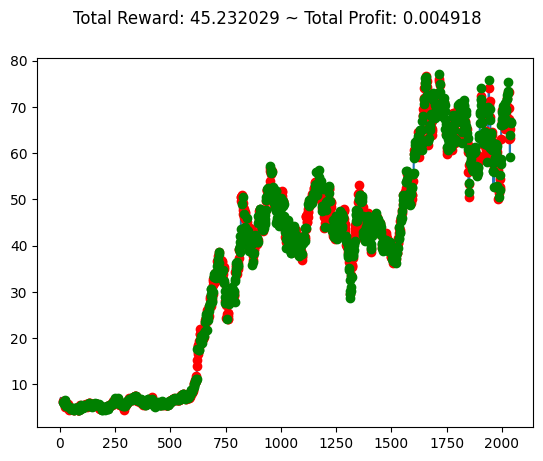

In [203]:

observation = env.reset(seed=2024)
while True:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    # env.render()
    if done:
        print("info:", info)
        break

plt.cla()
env.unwrapped.render_all()
plt.show()

### 5 creating and training the model

In [ ]:
model = A2C("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=1000000)

Streaming output truncated to the last 5000 lines.
|    value_loss         | 3.59     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 2.03e+03 |
|    ep_rew_mean        | 28.8     |
| time/                 |          |
|    fps                | 513      |
|    iterations         | 27900    |
|    time_elapsed       | 271      |
|    total_timesteps    | 139500   |
| train/                |          |
|    entropy_loss       | -0.04    |
|    explained_variance | -19.8    |
|    learning_rate      | 0.0007   |
|    n_updates          | 27899    |
|    policy_loss        | 0.000146 |
|    value_loss         | 0.000609 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 2.03e+03 |
|    ep_rew_mean        | 28.7     |
| time/                 |          |
|    fps                | 513      |
|    iterations         

### Save model

In [ ]:
# model.save('ppo_1000000_15_senti')

In [ ]:
# del model

### Load model

In [ ]:
# model = A2C.load('/content/ppo_1000000_15_senti.zip')

### 6. Evaluate the model

info: {'total_reward': 25.218001000000015, 'total_profit': 15.015001843669554, 'position': <Positions.Long: 1>}


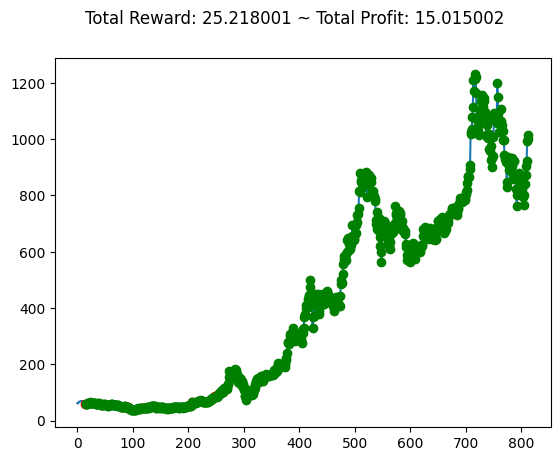

In [211]:
env = MyCustomEnv(df=test_df, frame_bound=(WINDOW_SIZE, len(test_df)), window_size=WINDOW_SIZE)



observation, info = env.reset(seed=2024)
while True:
    # print('ob',observation)
    action = model.predict(observation)
    # print('action',action[0])
    observation, reward, terminated, truncated, info = env.step(action[0])
    done = terminated or truncated

    # env.render()
    if done:
        print("info:", info)
        break

plt.cla()
env.unwrapped.render_all()
plt.show()


In [212]:
AWR = env.history['total_profit']

average_sharpe_ratio = np.mean(AWR) / np.std(AWR)
print('Sharpe Ratio:', average_sharpe_ratio)

Sharpe Ratio: 2.1914810182870164


In [ ]:
# Create a plot for the total profit
plt.figure(figsize=(10, 6))
plt.plot(AWR, label='Total Profit')
plt.title('Total Profit Over Time')
plt.xlabel('Time')
plt.ylabel('Total Profit')
plt.legend()

# Annotate the plot with the Sharpe Ratio
plt.annotate(f'Sharpe Ratio: {average_sharpe_ratio:.2f}',
             xy=(0.7, 0.1), xycoords='axes fraction',
             fontsize=12, color='green')

# Show the plot
plt.show()